In [ ]:
# Trabajo Práctico N°3 - Big Data & Machine Learning
# Universidad de Buenos Aires, 2025
# Grupo: 18
# Región seleccionada: Patagonia

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Desde la ubicacion de los archivos copiamos los codigo de ruta y cargamos las bases de datos
df_2004 = pd.read_stata(r"C:\Users\facun\OneDrive\Documentos\usu_individual_T104.dta")
df_2024 = pd.read_excel(r"C:\Users\facun\OneDrive\Documentos\usu_individual_T124.xlsx.xlsx")

# Estandarizar nombres de columnas a mayúsculas
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

# Ya que la Patagonia es la region elegida buscamos su correcta denominacion y filtramos
df_2004['REGION'] = df_2004['REGION'].astype(str)
df_2024['REGION'] = df_2024['REGION'].astype(str)

df_2004 = df_2004[df_2004['REGION'] == 'Patagónica']
df_2024 = df_2024[df_2024['REGION'] == '43']  

# Agregamos ambas columnas con su correspondiente año
df_2004['ANO4'] = 2004
df_2024['ANO4'] = 2024

# Seleccionar variables comunes elegidas
variables_seleccionadas = [
    'P47T', 'IPCF', 'CH04', 'CH06', 'CH08', 
    'P21', 'CAT_INAC', 'PP04D_COD', 'PP04A', 'TRIMESTRE',
    'REGION', 'AGLOMERADO', 'IDECCFR', 'ANO4', 'ESTADO'
]

# En este paso nos aseguramos que estas variables sean numericas
numeric_vars = ['CH06', 'IPCF', 'P21', 'P47T']
for var in numeric_vars:
    if var in df_2004.columns:
        df_2004[var] = pd.to_numeric(df_2004[var], errors='coerce')
    if var in df_2024.columns:
        df_2024[var] = pd.to_numeric(df_2024[var], errors='coerce')

# Unimos ambas bases de datos en una sola llamada df_combinado
df_combinado = pd.concat(
    [df_2004[variables_seleccionadas], df_2024[variables_seleccionadas]],
    ignore_index=True
)

# Aqui contamos la cantidad de veces que aparecen los valores
print("Conteo de observaciones por año:")
print(df_combinado['ANO4'].value_counts())

# Análisis de valores faltantes
valores_faltantes = df_combinado[variables_seleccionadas].isna().sum()
print("Valores faltantes por variable:")
print(valores_faltantes)

# Agrupamos datos por años y contamos sus valores
faltantes_por_anio = df_combinado.groupby("ANO4", group_keys=False).apply(lambda df: df.isnull().sum())
faltantes_por_anio = faltantes_por_anio.transpose()

#A partir de aqui realizamos una limpieza de datos negativos y los cambiamos por NaN para luego visuualizarlo

print("Valores faltantes por año:")
print(faltantes_por_anio)

df_combinado['P47T'] = df_combinado['P47T'].apply(lambda x: x if x is None or x >= 0 else np.nan)
df_combinado['IPCF'] = df_combinado['IPCF'].apply(lambda x: x if x is None or x >= 0 else np.nan)

print("Cantidad de valores NaN en ingresos después de limpiar:")
print("P47T:", df_combinado['P47T'].isna().sum())
print("IPCF:", df_combinado['IPCF'].isna().sum())


Conteo de observaciones por año:
ANO4
2024    14410
2004     3264
Name: count, dtype: int64
Valores faltantes por variable:
P47T            15
IPCF             0
CH04             0
CH06            51
CH08             0
P21              0
CAT_INAC         0
PP04D_COD     8108
PP04A         8108
TRIMESTRE        0
REGION           0
AGLOMERADO       0
IDECCFR          0
ANO4             0
ESTADO           0
dtype: int64
Valores faltantes por año:
ANO4        2004  2024
P47T           0    15
IPCF           0     0
CH04           0     0
CH06          51     0
CH08           0     0
P21            0     0
CAT_INAC       0     0
PP04D_COD      0  8108
PP04A          0  8108
TRIMESTRE      0     0
REGION         0     0
AGLOMERADO     0     0
IDECCFR        0     0
ANO4           0     0
ESTADO         0     0
Cantidad de valores NaN en ingresos después de limpiar:
P47T: 2040
IPCF: 0


C:\Users\facun\AppData\Local\Temp\ipykernel_8824\3405458157.py:55: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  faltantes_por_anio = df_combinado.groupby("ANO4", group_keys=False).apply(lambda df: df.isnull().sum())


In [29]:
# Normalizar ESTADO
estado_map = {
    1: "Ocupado", 2: "Desocupado", 3: "Inactivo", 4: "Menor de 10 años", 0: "No respondió",
    "Ocupado": "Ocupado", "Desocupado": "Desocupado", "Inactivo": "Inactivo",
    "Menor de 10 años": "Menor de 10 años",
    "Entrevista individual no realizada (no respuesta al cuestionario individual)": "No respondió"
}
df_combinado["ESTADO"] = df_combinado["ESTADO"].replace(estado_map)

# Conteo por ESTADO y AÑO
conteo_estado_anio = df_combinado.groupby(["ANO4", "ESTADO"]).size().unstack(fill_value=0)
print("Conteo por ESTADO y AÑO:")
print(conteo_estado_anio)

Conteo por ESTADO y AÑO:
ESTADO  Desocupado  Inactivo  Menor de 10 años  No respondió  Ocupado
ANO4                                                                 
2004           119      1307               600             0     1238
2024           453      5909              1731            15     6302


In [31]:
media_ipcf_estado_anio = df_combinado.groupby(["ANO4", "ESTADO"])["IPCF"].mean().unstack()
print("\nMedia de IPCF por ESTADO y AÑO:")
print(media_ipcf_estado_anio)



Media de IPCF por ESTADO y AÑO:
ESTADO    Desocupado       Inactivo  Menor de 10 años  No respondió  \
ANO4                                                                  
2004      225.452935     364.990445        297.985339           NaN   
2024    99393.792848  137703.875421     109606.266626           0.0   

ESTADO        Ocupado  
ANO4                   
2004       551.186902  
2024    179600.563797  


In [33]:
no_respondieron_count = df_combinado[df_combinado["ESTADO"] == "No respondió"].shape[0]
print(f"Cantidad de personas que no respondieron su condición de actividad: {no_respondieron_count}")

respondieron = df_combinado[df_combinado["ESTADO"] != "No respondió"].copy()
norespondieron = df_combinado[df_combinado["ESTADO"] == "No respondió"].copy()
respondieron.to_csv("respondieron.csv", index=False)
norespondieron.to_csv("norespondieron.csv", index=False)

Cantidad de personas que no respondieron su condición de actividad: 15


In [35]:
df_combinado["desocupado"] = df_combinado["ESTADO"].apply(lambda x: 1 if x == "Desocupado" else 0)
desocupados_por_anio = df_combinado.groupby("ANO4")["desocupado"].sum()
print("Cantidad de personas desocupadas por año:")
print(desocupados_por_anio)

Cantidad de personas desocupadas por año:
ANO4
2004    119
2024    453
Name: desocupado, dtype: int64


In [ ]:
#Parte I: Creación de variables, histogramas, kernels y resumen de la base de datos final

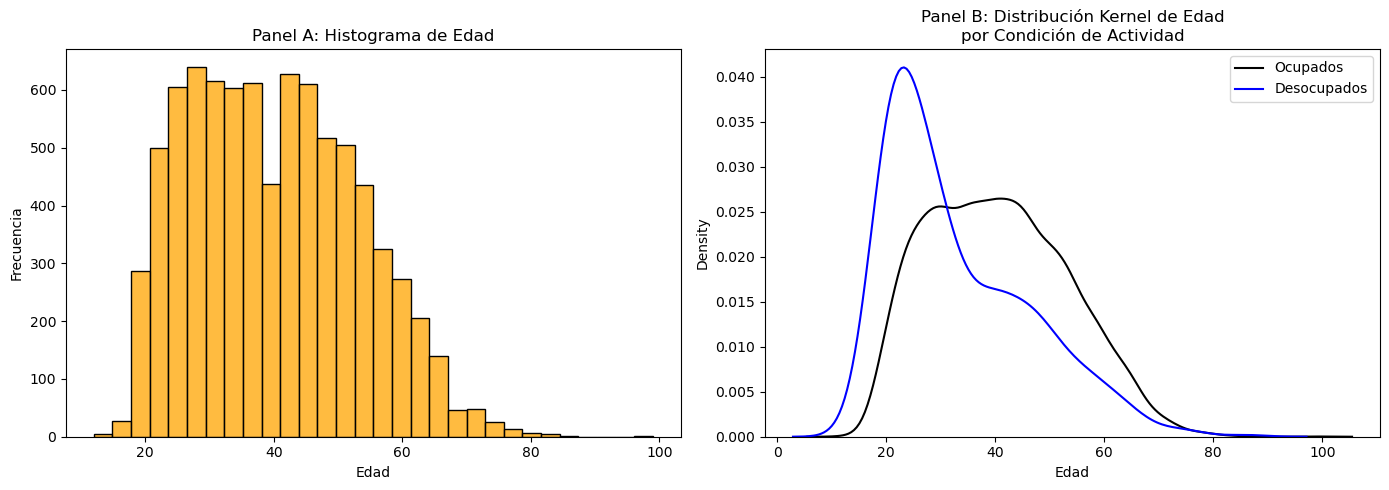

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear la nueva variable edad²
df_combinado['edad2'] = df_combinado['CH06'] ** 2

# 2. Filtrar datos válidos de edad y ocupación
df_edad = df_combinado[df_combinado['CH06'].notna() & (df_combinado['CH06'] > 0)]
df_edad = df_edad[df_edad['ESTADO'].isin(['Ocupado', 'Desocupado'])]

# 3. Graficar
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Panel A: Histograma de edades
sns.histplot(data=df_edad, x='CH06', bins=30, ax=axes[0], color='orange')
axes[0].set_title('Panel A: Histograma de Edad')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')

# Panel B: Distribuciones kernel para ocupados y desocupados
sns.kdeplot(data=df_edad[df_edad['ESTADO'] == 'Ocupado'], x='CH06', ax=axes[1], label='Ocupados', color='black')
sns.kdeplot(data=df_edad[df_edad['ESTADO'] == 'Desocupado'], x='CH06', ax=axes[1], label='Desocupados', color='blue')
axes[1].set_title('Panel B: Distribución Kernel de Edad\npor Condición de Actividad')
axes[1].set_xlabel('Edad')
axes[1].legend()

plt.tight_layout()
plt.show()

In [43]:
print(df_combinado.columns)

Index(['P47T', 'IPCF', 'CH04', 'CH06', 'CH08', 'P21', 'CAT_INAC', 'PP04D_COD',
       'PP04A', 'TRIMESTRE', 'REGION', 'AGLOMERADO', 'IDECCFR', 'ANO4',
       'ESTADO', 'desocupado', 'edad2'],
      dtype='object')


In [47]:
df_combinado = pd.concat(
    [df_2004[variables_seleccionadas], df_2024[variables_seleccionadas]],
    ignore_index=True
)

In [49]:
print(df_combinado['CH12'].unique())
print(df_combinado['CH13'].unique())
print(df_combinado['CH14'].unique())

['Secundario' 'Primario' 'Polimodal' 'EGB' 'Universitario' 0.0 'Terciario'
 'Jardín/Preescolar' 'Educación especial (discapacitado)'
 'Posgrado Universitario' 6 4 2 7 3 1 5 8 9 99]
['No' 'Sí' 0.0 1 2 9]
['01' '  ' '03' '02' '00' '06' '08' '04' '07' '05' '99' '98' '09' nan 2.0
 0.0 3.0 1.0 4.0 6.0 8.0 7.0 5.0 99.0 98.0 9.0]


In [53]:
# Estandarizar valores
df_combinado['CH12'] = df_combinado['CH12'].astype(str).str.strip().str.lower()
df_combinado['CH13'] = df_combinado['CH13'].astype(str).str.strip().str.lower()
df_combinado['CH14'] = pd.to_numeric(df_combinado['CH14'], errors='coerce')

# Mapeo del nivel educativo a base de años si completado
mapa_nivel = {
    'jardín/preescolar': 0,
    'educación especial (discapacitado)': 0,
    'primario': 6,
    'egb': 6,
    'secundario': 12,
    'polimodal': 12,
    'terciario': 14,
    'universitario': 17,
    'posgrado universitario': 20
}

# Función para calcular educ
def calcular_educ(row):
    nivel = row['CH12']
    finalizo = row['CH13']
    anio = row['CH14']

    base = mapa_nivel.get(nivel, np.nan)

    if pd.isna(base):
        return np.nan

    if finalizo == 'sí':
        return base
    elif not pd.isna(anio):
        # Si no finalizó, sumamos años aprobados al tramo anterior
        if base == 6:
            return anio  # Primaria incompleta
        elif base == 12:
            return 6 + anio  # Secundaria incompleta
        elif base == 14:
            return 12 + anio  # Terciaria incompleta
        elif base == 17:
            return 14 + anio  # Universitaria incompleta
        else:
            return anio
    else:
        return np.nan

df_combinado['educ'] = df_combinado.apply(calcular_educ, axis=1)
df_combinado['educ'] = df_combinado['educ'].round(0).astype('Int64')  # Redondeo entero

# Estadísticas descriptivas con valores enteros
print("Estadísticas de la variable 'educ':")
print(df_combinado['educ'].describe())


Estadísticas de la variable 'educ':
count       3014.0
mean      9.235236
std      10.451478
min            0.0
25%            6.0
50%            8.0
75%           12.0
max          113.0
Name: educ, dtype: Float64


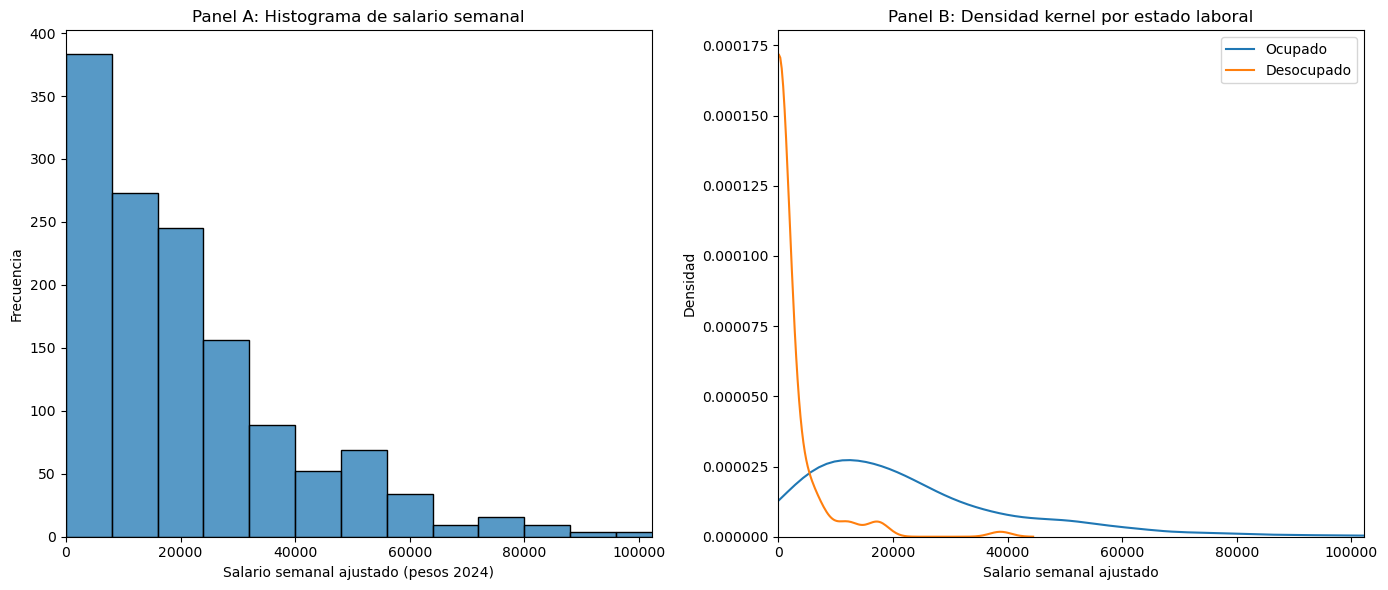

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ajuste de poder adquisitivo: $1 en 2004 ≈ $1000 en 2024
ajuste_2004 = 1000

# Asegurarse que P47T sea numérico y limpiar negativos
df_combinado['P47T'] = pd.to_numeric(df_combinado['P47T'], errors='coerce')
df_combinado['P47T'] = df_combinado['P47T'].apply(lambda x: x if pd.isna(x) or x >= 0 else np.nan)

# Crear ingreso ajustado a pesos de 2024
df_combinado['ingreso_ajustado'] = df_combinado.apply(
    lambda row: row['P47T'] * ajuste_2004 if row['ANO4'] == 2004 else row['P47T'],
    axis=1
)

# Crear variable salario_semanal
df_combinado['salario_semanal'] = df_combinado['ingreso_ajustado'] / 40

# Filtrar datos válidos para graficar
df_valid = df_combinado[df_combinado['salario_semanal'].notna()]
df_valid = df_valid[df_valid['ESTADO'].isin(['Ocupado', 'Desocupado'])]

# Panel A y B
plt.figure(figsize=(14, 6))

# Panel A: Histograma
plt.subplot(1, 2, 1)
sns.histplot(df_valid['salario_semanal'], bins=30)
plt.title("Panel A: Histograma de salario semanal")
plt.xlabel("Salario semanal ajustado (pesos 2024)")
plt.ylabel("Frecuencia")
plt.xlim(0, df_valid['salario_semanal'].quantile(0.99))  # evitar outliers extremos

# Panel B: Distribuciones kernel
plt.subplot(1, 2, 2)
sns.kdeplot(data=df_valid[df_valid['ESTADO'] == 'Ocupado'], x='salario_semanal', label='Ocupado')
sns.kdeplot(data=df_valid[df_valid['ESTADO'] == 'Desocupado'], x='salario_semanal', label='Desocupado')
plt.title("Panel B: Densidad kernel por estado laboral")
plt.xlabel("Salario semanal ajustado")
plt.ylabel("Densidad")
plt.legend()
plt.xlim(0, df_valid['salario_semanal'].quantile(0.99))  # evitar colas largas

plt.tight_layout()
plt.show()


In [119]:
df_2004_horas = df_2004[['PP3E_TOT', 'PP3F_TOT']].reset_index(drop=True)
df_2024_horas = df_2024[['PP3E_TOT', 'PP3F_TOT']].reset_index(drop=True)

# Concatenar respetando el orden
df_horas = pd.concat([df_2004_horas, df_2024_horas], ignore_index=True)

# Asegurar alineación con df_combinado
df_combinado = df_combinado.reset_index(drop=True)
df_combinado[['PP3E_TOT', 'PP3F_TOT']] = df_horas

# Crear variable de horas trabajadas
df_combinado['horastrab'] = df_combinado['PP3E_TOT'].fillna(0) + df_combinado['PP3F_TOT'].fillna(0)

#  seleccionar ocupados con horas válidas
df_horas_final = df_combinado[(df_combinado['ESTADO'] == 'Ocupado') & (df_combinado['horastrab'] > 0)]

# Filtrar casos razonables (descartar outliers extremos)
df_horas_filtradas = df_horas_final[df_horas_final['horastrab'] <= 100]

stats_filtradas = df_horas_filtradas['horastrab'].describe(percentiles=[0.5]).round(2)
print(stats_filtradas)


count    1118.00
mean       43.06
std        18.56
min         2.00
50%        42.00
max        99.00
Name: horastrab, dtype: float64


In [71]:
import pandas as pd

# Aseguramos que el DataFrame base esté listo
df_estado_clean = df_combinado.copy()

# Conteo total de observaciones
cantidad_obs_2004 = df_estado_clean[df_estado_clean['ANO4'] == 2004].shape[0]
cantidad_obs_2024 = df_estado_clean[df_estado_clean['ANO4'] == 2024].shape[0]
total_obs = df_estado_clean.shape[0]

# Observaciones con NaN en la variable ESTADO
na_estado_2004 = df_estado_clean[(df_estado_clean['ANO4'] == 2004) & (df_estado_clean['ESTADO'].isna())].shape[0]
na_estado_2024 = df_estado_clean[(df_estado_clean['ANO4'] == 2024) & (df_estado_clean['ESTADO'].isna())].shape[0]
na_estado_total = df_estado_clean['ESTADO'].isna().sum()

# Ocupados
ocup_2004 = df_estado_clean[(df_estado_clean['ANO4'] == 2004) & (df_estado_clean['ESTADO'] == 'Ocupado')].shape[0]
ocup_2024 = df_estado_clean[(df_estado_clean['ANO4'] == 2024) & (df_estado_clean['ESTADO'] == 'Ocupado')].shape[0]
ocup_total = df_estado_clean[df_estado_clean['ESTADO'] == 'Ocupado'].shape[0]

# Desocupados
desocup_2004 = df_estado_clean[(df_estado_clean['ANO4'] == 2004) & (df_estado_clean['ESTADO'] == 'Desocupado')].shape[0]
desocup_2024 = df_estado_clean[(df_estado_clean['ANO4'] == 2024) & (df_estado_clean['ESTADO'] == 'Desocupado')].shape[0]
desocup_total = df_estado_clean[df_estado_clean['ESTADO'] == 'Desocupado'].shape[0]

# Cantidad de variables (columnas)
cantidad_variables = df_estado_clean.shape[1]

# Construir tabla resumen
tabla_resumen = pd.DataFrame({
    "2004": [cantidad_obs_2004, na_estado_2004, ocup_2004, desocup_2004, cantidad_variables],
    "2024": [cantidad_obs_2024, na_estado_2024, ocup_2024, desocup_2024, cantidad_variables],
    "Total": [total_obs, na_estado_total, ocup_total, desocup_total, cantidad_variables]
}, index=[
    "Cantidad observaciones",
    "Cantidad de observaciones con Nas en la variable 'Estado'",
    "Cantidad de Ocupados",
    "Cantidad de Desocupados",
    "Cantidad de variables limpias y homogenizadas"
])

# Mostrar la tabla
print("Tabla 1 – Resumen de la base final para la región Patagonia:")
print(tabla_resumen)


Tabla 1 – Resumen de la base final para la región Patagonia:
                                                    2004   2024  Total
Cantidad observaciones                              3264  14410  17674
Cantidad de observaciones con Nas en la variabl...     0      0      0
Cantidad de Ocupados                                1238      0   1238
Cantidad de Desocupados                              119      0    119
Cantidad de variables limpias y homogenizadas         24     24     24


In [75]:
df_combinado['edad'] = pd.to_numeric(df_combinado.get('P21'), errors='coerce')
df_combinado['edad2'] = df_combinado['edad'] ** 2

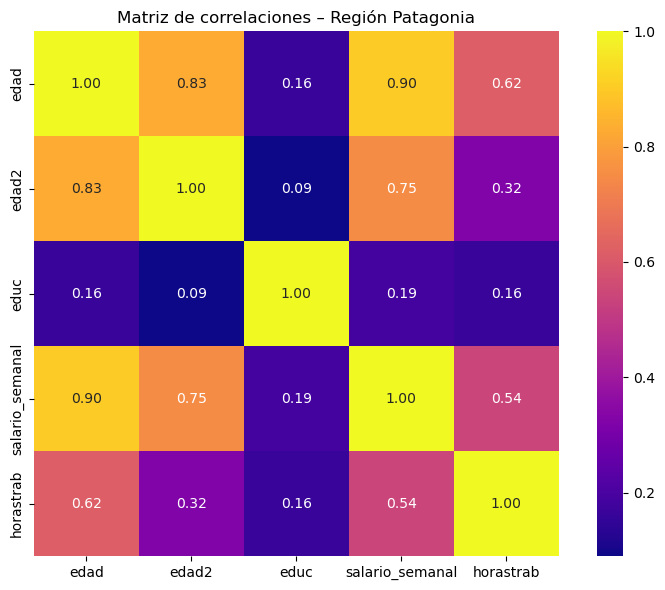

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

variables_corr = ['edad', 'edad2', 'educ', 'salario_semanal', 'horastrab']
df_corr = df_combinado[variables_corr].dropna()

matriz_corr = df_corr.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='plasma', square=True)
plt.title("Matriz de correlaciones – Región Patagonia")
plt.tight_layout()
plt.show()


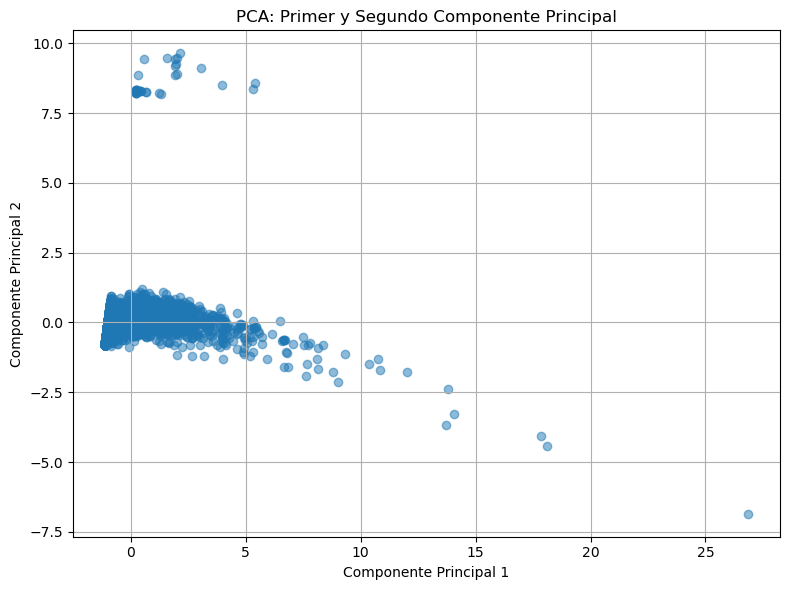

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Crear las variables edad y edad2 si no existen
df_combinado['edad'] = pd.to_numeric(df_combinado.get('P21'), errors='coerce')
df_combinado['edad2'] = df_combinado['edad'] ** 2

# Seleccionar las variables
vars_pca = ['edad', 'edad2', 'educ', 'salario_semanal', 'horastrab']
df_pca = df_combinado[vars_pca].dropna()

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame con componentes
df_pca_resultado = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Graficar dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_resultado['PC1'], df_pca_resultado['PC2'], alpha=0.5)
plt.title("PCA: Primer y Segundo Componente Principal")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()


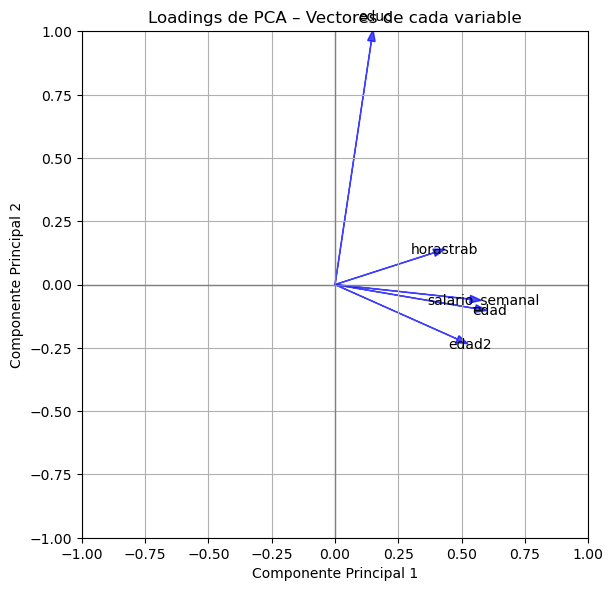

In [91]:
# Asumimos que X_scaled y pca ya están definidos
df_combinado = pd.concat([df_2004[variables_seleccionadas], df_2024[variables_seleccionadas]], ignore_index=True)
# Obtener nombres de las variables
var_names = ['edad', 'edad2', 'educ', 'salario_semanal', 'horastrab']

# Coordenadas de los vectores (componentes)
loadings = pca.components_.T  # transponer para que filas sean variables

# Graficar flechas sobre un plano (PC1 vs PC2)
plt.figure(figsize=(8, 6))
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)

# Dibujar cada vector como flecha desde el origen
for i, var in enumerate(var_names):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1],
              color='blue', alpha=0.7, head_width=0.03)
    plt.text(loadings[i, 0]*1.1, loadings[i, 1]*1.1, var,
             color='black', ha='center', va='center')

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Loadings de PCA – Vectores de cada variable")
plt.grid(True)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal', 'box')
plt.tight_layout()
plt.show()


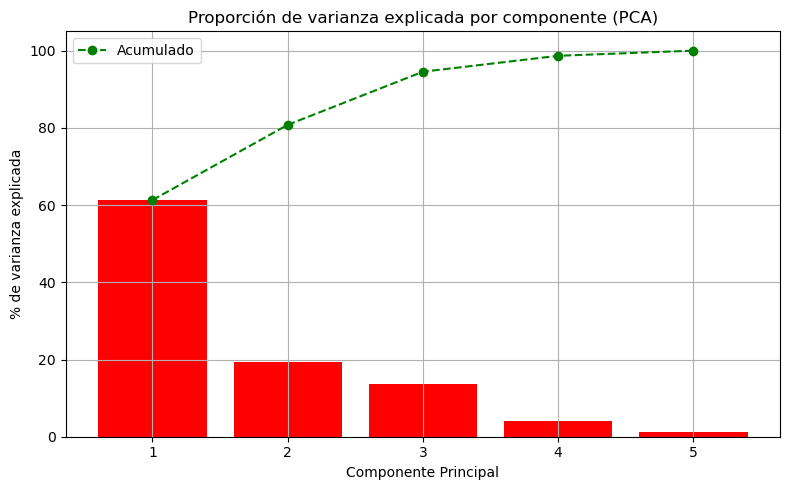

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Aplicar PCA con 5 componentes (tantas como variables)
pca_full = PCA(n_components=5)
pca_full.fit(X_scaled)

# Obtener varianza explicada por componente
varianza = pca_full.explained_variance_ratio_

# Graficar
plt.figure(figsize=(8, 5))
components = np.arange(1, len(varianza) + 1)
plt.bar(components, varianza * 100, color='red')
plt.plot(components, np.cumsum(varianza) * 100, color='green', marker='o', linestyle='--', label='Acumulado')
plt.title('Proporción de varianza explicada por componente (PCA)')
plt.xlabel('Componente Principal')
plt.ylabel('% de varianza explicada')
plt.xticks(components)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\facun\Nueva carpeta\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\facun\Nueva carpeta\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


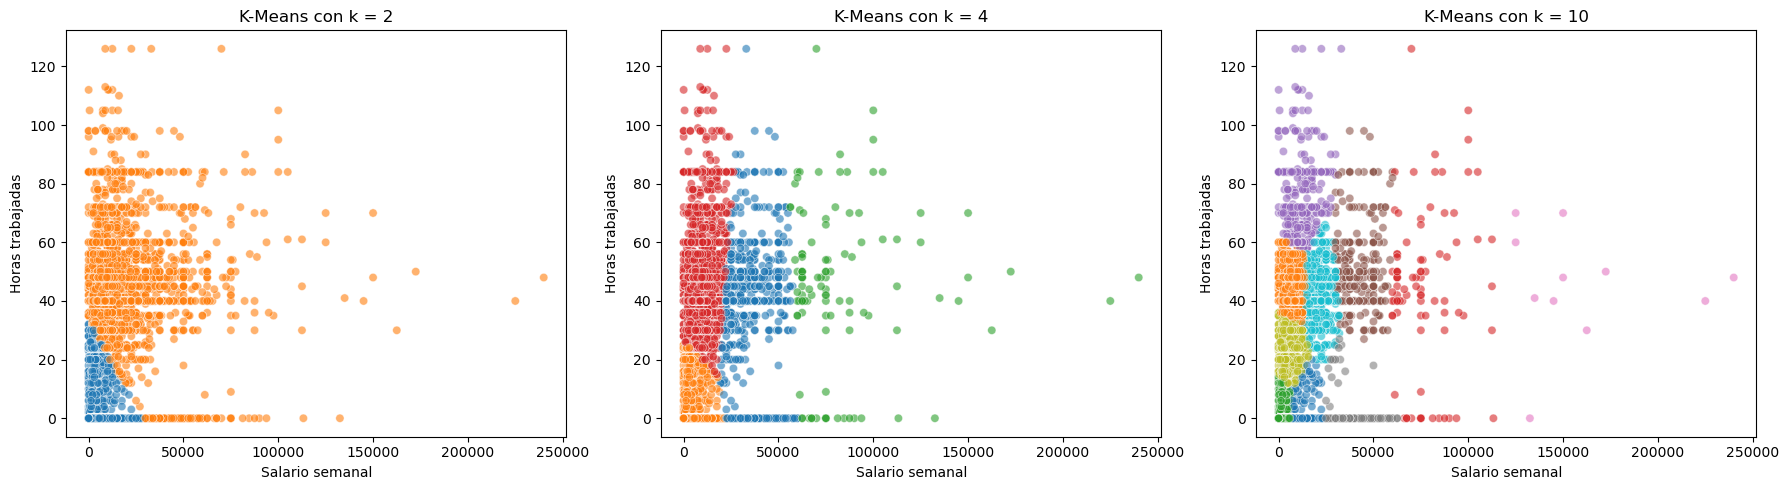

In [121]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# --- Selección de predictores ---
# Asegurate de que estas columnas existan y no tengan NaN
df_kmeans = df_combinado[['salario_semanal', 'horastrab']].dropna()

# Estandarización para clustering
X = StandardScaler().fit_transform(df_kmeans)

# Valores de k a usar
ks = [2, 4, 10]

# Crear los gráficos
plt.figure(figsize=(18, 5))

for i, k in enumerate(ks):
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    df_kmeans[f'cluster_{k}'] = kmeans.fit_predict(X)

    # Gráfico
    plt.subplot(1, 3, i+1)
    sns.scatterplot(
        x=df_kmeans['salario_semanal'],
        y=df_kmeans['horastrab'],
        hue=df_kmeans[f'cluster_{k}'],
        palette='tab10',
        legend=False,
        alpha=0.6
    )
    plt.title(f'K-Means con k = {k}')
    plt.xlabel('Salario semanal')
    plt.ylabel('Horas trabajadas')

plt.tight_layout()
plt.show()


C:\Users\facun\Nueva carpeta\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


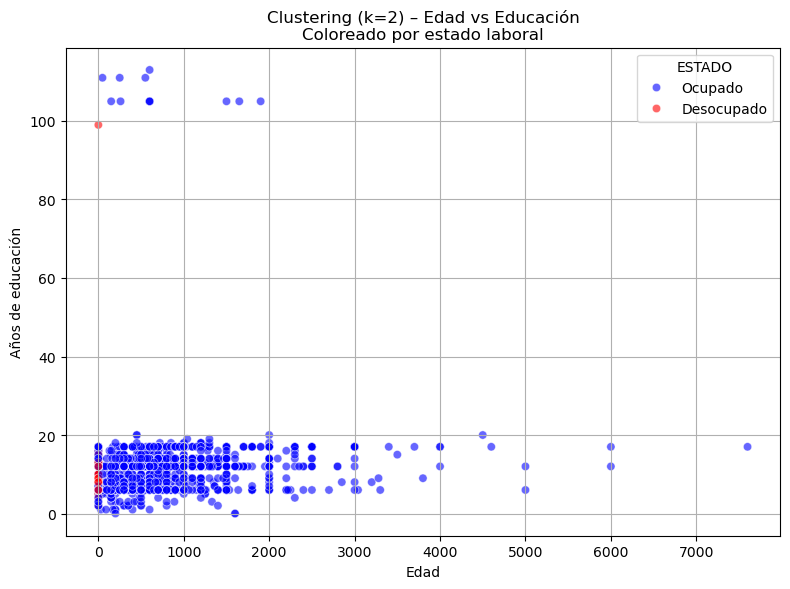

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filtrar datos válidos con estado laboral, edad y educación
df_valid = df_combinado[['edad', 'educ', 'ESTADO']].dropna()
df_valid = df_valid[df_valid['ESTADO'].isin(['Ocupado', 'Desocupado'])]

# 2. Estandarizar edad y educ
X = StandardScaler().fit_transform(df_valid[['edad', 'educ']])

# 3. K-means con k = 2
kmeans = KMeans(n_clusters=2, n_init=20, random_state=42)
df_valid['cluster_k2'] = kmeans.fit_predict(X)

# 4. Graficar puntos coloreados por estado laboral
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_valid,
    x='edad',
    y='educ',
    hue='ESTADO',
    palette={'Ocupado': 'blue', 'Desocupado': 'red'},
    alpha=0.6
)
plt.title('Clustering (k=2) – Edad vs Educación\nColoreado por estado laboral')
plt.xlabel('Edad')
plt.ylabel('Años de educación')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\facun\Nueva carpeta\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


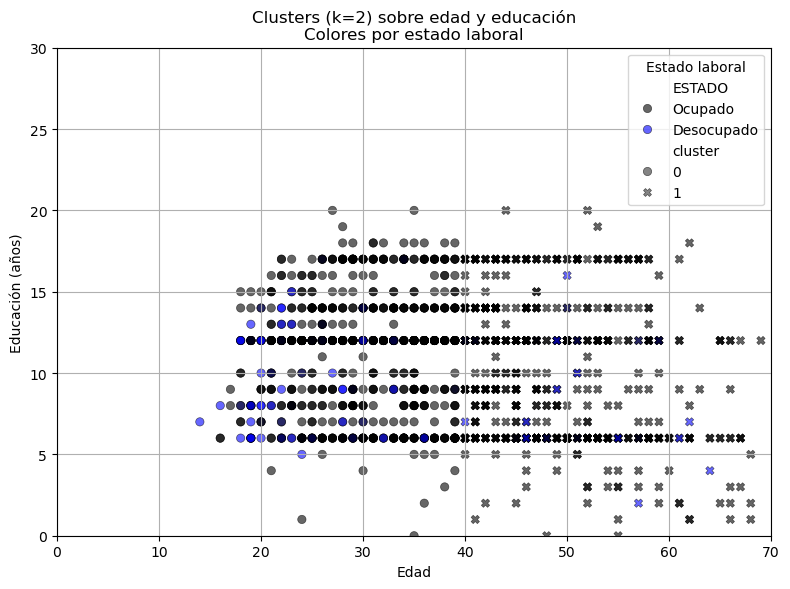

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Paso 1: Filtrar datos válidos
df_plot = df_combinado[['CH06', 'educ', 'ESTADO']].dropna()
df_plot = df_plot[df_plot['ESTADO'].isin(['Ocupado', 'Desocupado'])]
df_plot = df_plot.rename(columns={'CH06': 'edad'})

# Paso 2: Clustering k = 2 con edad y educ
X_k2 = df_plot[['edad', 'educ']]
kmeans = KMeans(n_clusters=2, n_init=20, random_state=42)
df_plot['cluster'] = kmeans.fit_predict(X_k2)

# Paso 3: Graficar con límites
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x='edad',
    y='educ',
    hue='ESTADO',
    style='cluster',
    palette={'Ocupado': 'black', 'Desocupado': 'blue'},
    markers=True,
    edgecolor='black',
    alpha=0.6
)
plt.xlim(0, 70)
plt.ylim(0, 30)
plt.title('Clusters (k=2) sobre edad y educación\nColores por estado laboral')
plt.xlabel('Edad')
plt.ylabel('Educación (años)')
plt.legend(title='Estado laboral')
plt.grid(True)
plt.tight_layout()
plt.show()


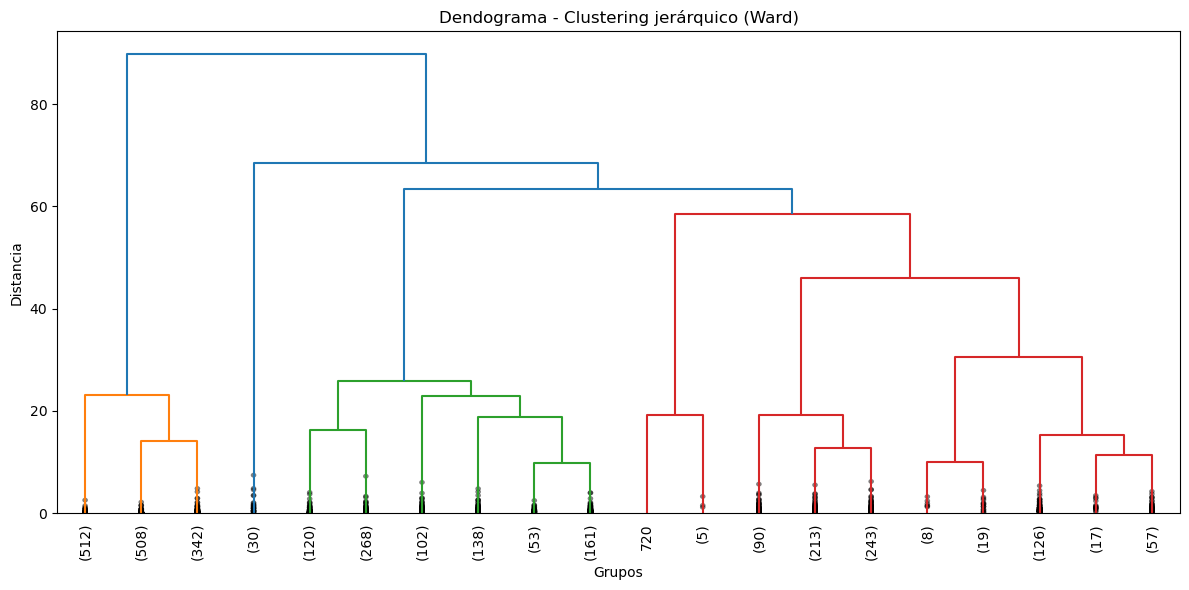

In [133]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Datos limpios y estandarizados
df_h = df_combinado[['CH06', 'edad2', 'educ', 'salario_semanal', 'horastrab']].dropna()
df_h = df_h.rename(columns={'CH06': 'edad'})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_h)

# Linkage con método 'ward'
Z = linkage(X_scaled, method='ward')

# Dendograma con truncamiento visual, sin cortar Z
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=20, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title('Dendograma - Clustering jerárquico (Ward)')
plt.xlabel('Grupos')
plt.ylabel('Distancia')
plt.tight_layout()
plt.show()